In [15]:
import numpy as np # linear algebra
import pandas as pd 
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [16]:
data = pd.read_csv('./MDB.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,2017-10-19,33.00,34.00,29.100,32.07,11508466
1,2017-10-20,33.37,33.37,30.100,30.68,2358653
2,2017-10-23,30.51,31.33,30.190,30.50,749397
3,2017-10-24,30.46,30.92,30.439,30.57,420725
4,2017-10-25,30.50,31.10,29.880,31.00,1219442


In [17]:
# Reset index
data.reset_index(drop=True, inplace=True)

# Select numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Fill NaN values in numeric columns with the mean of those columns
data[numeric_data.columns] = data[numeric_data.columns].fillna(numeric_data.mean())

# Display the first few rows of the DataFrame
print(data.head())

         Date   Open   High     Low  Close    Volume
0  2017-10-19  33.00  34.00  29.100  32.07  11508466
1  2017-10-20  33.37  33.37  30.100  30.68   2358653
2  2017-10-23  30.51  31.33  30.190  30.50    749397
3  2017-10-24  30.46  30.92  30.439  30.57    420725
4  2017-10-25  30.50  31.10  29.880  31.00   1219442


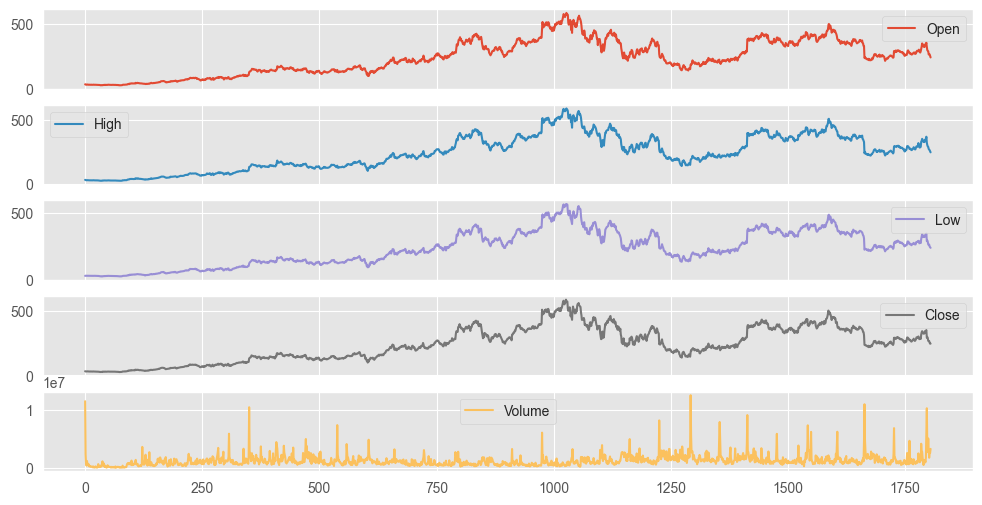

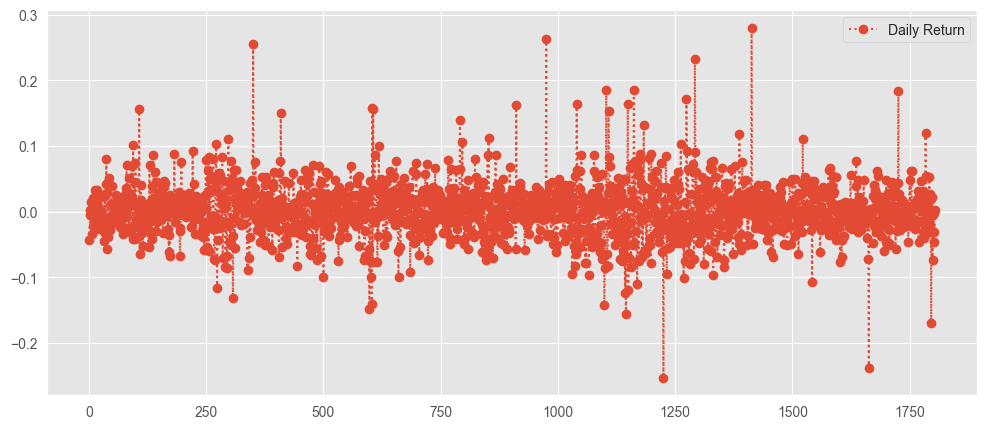

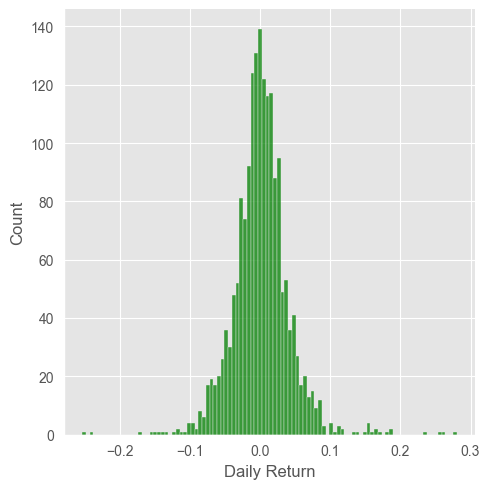

            Date    Open    High       Low   Close    Volume  MA for 10 days  \
0     2017-10-19   33.00   34.00   29.1000   32.07  11508466             NaN   
1     2017-10-20   33.37   33.37   30.1000   30.68   2358653             NaN   
2     2017-10-23   30.51   31.33   30.1900   30.50    749397             NaN   
3     2017-10-24   30.46   30.92   30.4390   30.57    420725             NaN   
4     2017-10-25   30.50   31.10   29.8800   31.00   1219442             NaN   
...          ...     ...     ...       ...     ...       ...             ...   
1800  2024-12-16  264.23  274.71  260.3000  265.63   3020356         310.269   
1801  2024-12-17  266.99  269.49  263.1001  265.10   1782440         304.378   
1802  2024-12-18  264.68  265.13  249.1100  252.67   2576329         295.514   
1803  2024-12-19  252.48  255.90  243.3000  245.00   2601869         286.583   
1804  2024-12-20  241.13  248.57  239.1800  245.63   3307375         276.806   

      MA for 50 days  MA for 100 days  

Date                0
Open                0
High                0
Low                 0
Close               0
Volume              0
MA for 10 days      9
MA for 50 days     49
MA for 100 days    99
Daily Return        1
dtype: int64

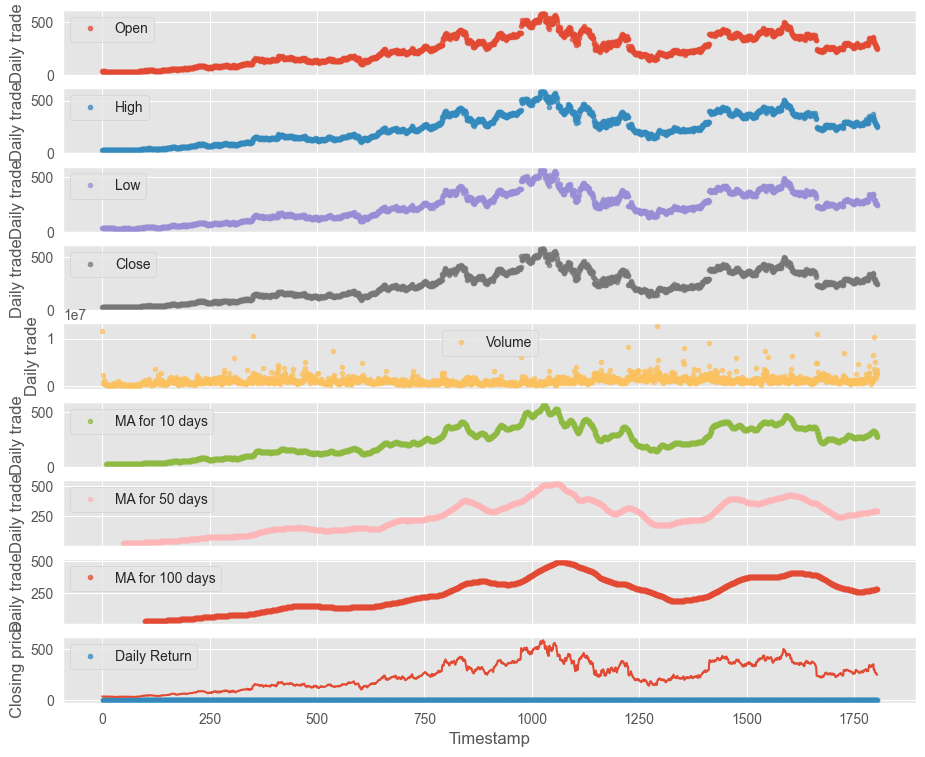

In [18]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()

data['Daily Return'] = data['Close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

            Date    Open    High       Low   Close    Volume  MA for 10 days  \
0     2017-10-19   33.00   34.00   29.1000   32.07  11508466             NaN   
1     2017-10-20   33.37   33.37   30.1000   30.68   2358653             NaN   
2     2017-10-23   30.51   31.33   30.1900   30.50    749397             NaN   
3     2017-10-24   30.46   30.92   30.4390   30.57    420725             NaN   
4     2017-10-25   30.50   31.10   29.8800   31.00   1219442             NaN   
...          ...     ...     ...       ...     ...       ...             ...   
1800  2024-12-16  264.23  274.71  260.3000  265.63   3020356         310.269   
1801  2024-12-17  266.99  269.49  263.1001  265.10   1782440         304.378   
1802  2024-12-18  264.68  265.13  249.1100  252.67   2576329         295.514   
1803  2024-12-19  252.48  255.90  243.3000  245.00   2601869         286.583   
1804  2024-12-20  241.13  248.57  239.1800  245.63   3307375         276.806   

      MA for 50 days  MA for 100 days  

,count,mean,std,min,25%,50%,75%,max
Open,1805.0,2.388549e+02,1.327430e+02,25.620000,134.870000,2.305300e+02,3.551600e+02,5.850300e+02
High,1805.0,2.446706e+02,1.355226e+02,26.030000,138.890000,2.358700e+02,3.620300e+02,5.900000e+02
Low,1805.0,2.330721e+02,1.298041e+02,24.620000,131.521600,2.252500e+02,3.490900e+02,5.665701e+02
Close,1805.0,2.388474e+02,1.325226e+02,25.760000,135.320000,2.309500e+02,3.553100e+02,5.850300e+02
Volume,1805.0,1.276362e+06,1.026261e+06,74505.000000,709497.000000,1.057672e+06,1.537746e+06,1.254206e+07
MA for 10 days,1796.0,2.393165e+02,1.316696e+02,26.702000,136.049750,2.297910e+02,3.548055e+02,5.673020e+02
MA for 50 days,1756.0,2.409872e+02,1.281823e+02,28.112600,139.969650,2.408628e+02,3.546304e+02,5.218732e+02
MA for 100 days,1706.0,2.435399e+02,1.241454e+02,29.845100,142.351600,2.537545e+02,3.403062e+02,4.920217e+02
Daily Return,1804.0,1.955603e-03,4.085526e-02,-0.253206,-0.019082,1.392529e-03,2.233365e-02,2.801061e-01


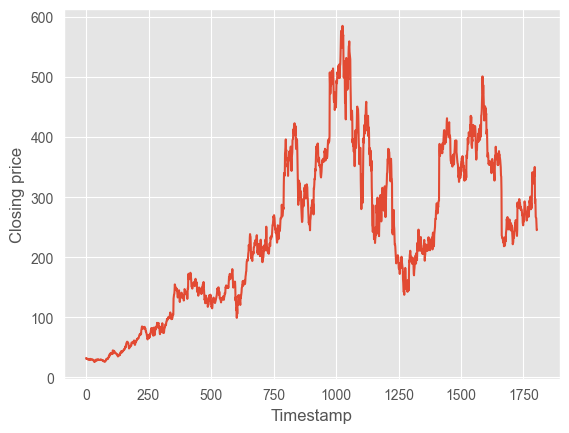

In [19]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [20]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

1362
341


In [21]:
from tensorflow.keras.models import load_model

# Load the model
foundation_model = load_model('foundation_model.keras')



c:\Users\timoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 22 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# # Evaluate the model on the testing data

# test_loss_foundation = foundation_model.evaluate(test_X, test_Y, verbose=1)
# print(f"Test Loss improved: {test_loss}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0206 - mae: 0.1117 - mse: 0.0206


NameError: name 'test_loss' is not defined

In [23]:
# make predictions
predicted  = foundation_model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def plot_predictions(test_label, predicted, title="Stock Price Prediction"):
    # Create figure and axis with specified size
    plt.figure(figsize=(15, 7))
    
    # Plot actual prices
    plt.plot(test_label, label='Actual Price', color='green')
    
    # Plot predicted prices
    plt.plot(predicted, label='Predicted Price', color='red')
    
    # Customize the plot
    plt.title(title, fontsize=16, pad=20)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Stock Price', fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add margins for better visibility
    plt.margins(x=0.02)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Show plot
    plt.show()

def evaluate_model(test_label, predicted):
    # Calculate performance metrics
    mse = mean_squared_error(test_label, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_label, predicted)
    mape = np.mean(np.abs((test_label - predicted) / test_label)) * 100

    # Print and return performance metrics
    results = {
        "Mean Squared Error (MSE)": mse,
        "Root Mean Squared Error (RMSE)": rmse,
        "Mean Absolute Error (MAE)": mae,
        "Mean Absolute Percentage Error (MAPE) in %": mape
    }


    return results

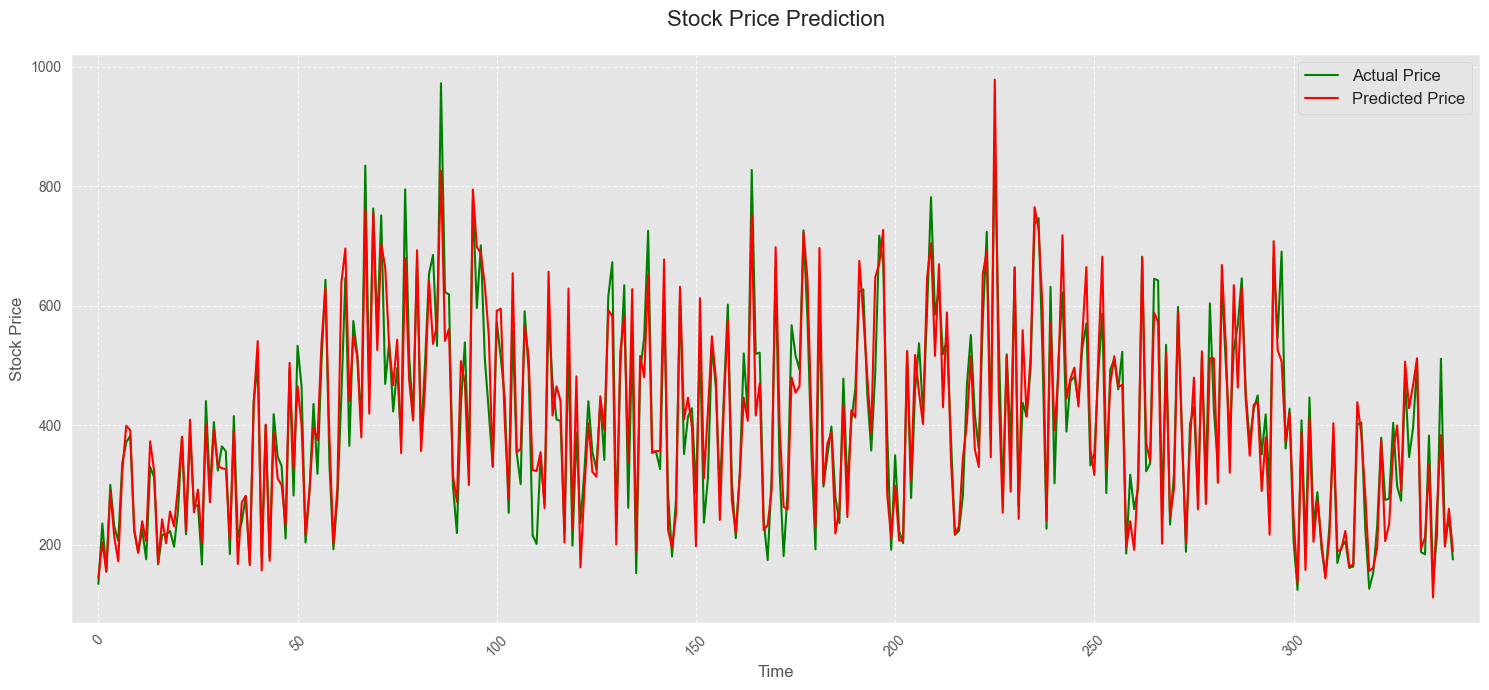

{'Mean Squared Error (MSE)': 2764.786000437062,
 'Root Mean Squared Error (RMSE)': 52.58123239747298,
 'Mean Absolute Error (MAE)': 39.93986784086645,
 'Mean Absolute Percentage Error (MAPE)': 10.46789665354255}

In [28]:
plot_predictions(test_label, predicted, "Stock Price Prediction")
evaluate_model(test_label, predicted)